<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import pandas as pd

df = pd.read_csv("../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [2]:
import re

def text_cleaner(text):
    """
    Basic text cleaner
    Takes text and removes basic extraneous characters
    
    Returns:
    Moderately cleaned text
    """
    
    text = text.lower()             # Lowercase string
    text = text.replace("\\n", " ") # Removes new lines
    text = text.replace("/", " ")   # Removes backslash
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text) # Keeps only letters and numbers
    
    return text

In [3]:
df["reviews.text"] = df.apply(lambda x: text_cleaner(x["reviews.text"]), axis=1)
df["reviews.text"]

0        i order 3 of them and one of the item is bad q...
1        bulk is always the less expensive way to go fo...
2        well they are not duracell but for the price i...
3        seem to work as well as name brand batteries a...
4        these batteries are very long lasting the pric...
                               ...                        
28327    i got 2 of these for my 8 yr old twins my 11 y...
28328    i bought this for my niece for a christmas gif...
28329    very nice for light internet browsing keeping ...
28330    this tablet does absolutely everything i want ...
28331    at ninety dollars the expectionations are low ...
Name: reviews.text, Length: 28332, dtype: object

In [4]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

# Additional STOP WORDS
STOP_WORDS = nlp.Defaults.stop_words.union(["batteries","I", 'amazon', 
                                            'i', 'Amazon', 'it', "it's", 
                                            'it.', 'the', 'this',])

# pipeline - lemmatize and remove any stopwords or spaces
tokens = []

for doc in tokenizer.pipe(df["reviews.text"]):
        
        lemmas = []
        
        for token in doc:
            if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.is_space == False) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_.lower())
        
        tokens.append(lemmas)

In [5]:
df["tokens"] =  tokens
df["tokens"].head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [bulk, expensive, way, product, like]
2                             [duracell, price, happy]
3                           [work, brand, well, price]
4                           [long, last, price, great]
Name: tokens, dtype: object

In [6]:
# count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ["word", "count"])

        wc["rank"] = wc["count"].rank(method="first", ascending=False)
        total = wc["count"].sum()

        wc["pct_total"] = wc["count"].apply(lambda x: x / total)
        
        wc = wc.sort_values(by="rank")
        wc["cul_pct_total"] = wc["pct_total"].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=["word", "appears_in"])
        wc = ac.merge(wc, on="word")

        wc["appears_in_pct"] = wc["appears_in"].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by="rank")

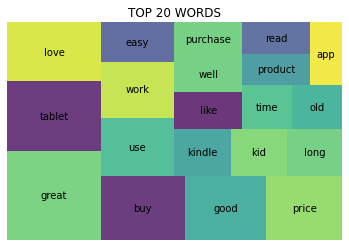

In [7]:
from collections import Counter

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc = count(df["tokens"])

wc_top20 = wc[wc["rank"] <= 20]

squarify.plot(sizes=wc_top20["pct_total"], label=wc_top20["word"], alpha=.8 )
plt.title("TOP 20 WORDS")
plt.axis("off")
plt.show()

## **Fit a Gensim LDA topic model on Amazon Reviews** 
## **Select an appropriate number of topics**

In [ ]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora

In [ ]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(df["tokens"])

# Filter extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

# Bag of Words(BOW) representation of our corpus
corpus = [id2word.doc2bow(text) for text in df["tokens"]]

In [ ]:
lda = LdaMulticore(corpus=corpus,       #data
                   id2word=id2word,     #dictionary
                   random_state=723812, 
                   num_topics = 5,      #I don't think there will be that many varying topics about tablets
                   passes=10,
                   workers=12
                  )

In [ ]:
#View Topics
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

## **Create some dope visualization of the topics**

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

## **Write a few bullets on your findings in markdown at the end**

I limited my findings to 5 topics, since these topics were focused on e-readers this felt like a safe bet. 
- Topic 1: good screen
- Topic 2: easy to use
- Topic 3: seems like it takes a long time to charge
- Topic 4: good price
- Topic 5: good for kids

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling